https://topnonprofits.com/lists/best-nonprofits-on-the-web/
https://www.forbes.com/lists/top-charities/#5c9f80be5f50

In [19]:
import requests  # To get the pages
from bs4 import BeautifulSoup # and to process them
from bs4.element import Comment

from time import sleep      # Allowing us to pause between pulls
from random import random   # And allowing that pause to be random

import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk import FreqDist

import sqlite3
import spacy
from subject_object_extraction import findSVOs

#for text wrapping
import textwrap

import matplotlib.pyplot as plt

import numpy as np
import scipy

import tweepy
from MD_API_Keys import api_key, api_key_secret, access_token, access_token_secret

sw = stopwords.words("english")
nlp = spacy.load("en_core_web_md")

In [2]:
##Authenticating tweepy
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

## Scraping Nonprofit Mission/Vision/Values

I will use web scraping to attain the mission/vision/values statements from 20 conservation nonprofits. Most often, this information is found on an 'About Us' page. I manually visited each nonprofit's website to confirm that I was pulling from the correct web pages.

In [3]:
##functions used for scraping code

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True



##Creating a file name for each URL from the nonprofits
def generate_filename_from_url(url) :
    
    if not url :
        return None
    
    # drop the http or https
    name = url.replace("https","").replace("http","")

    # Replace useless chareacters with UNDERSCORE
    name = name.replace("://","").replace(".","_").replace("/","_")
    
    # remove last underscore
    last_underscore_spot = name.rfind("_")
    
    name = name[:last_underscore_spot] + name[(last_underscore_spot+1):]

    # tack on .txt
    name = name + ".txt"
    
    return(name)




In [8]:
##Creating a dictionary to store the links to each nonprofit's mission/vision/values statements

nonprofit_pages = dict()

nonprofit_pages["about_us"] = """
https://wish.org/mission
https://www.rmhc.org/about-us
https://www.redcross.org/about-us/who-we-are/mission-and-values.html
https://www.npr.org/about/
https://www.nationalgeographic.org/about-us/
https://www.cancer.org/about-us.html
https://www.artic.edu/about-us/identity
https://www.humanesociety.org/our-mission
https://www.gatesfoundation.org/What-We-Do
https://www.unicefusa.org/mission
https://www.habitat.org/about/mission-and-vision
https://www.mayoclinic.org/about-mayo-clinic/mission-values
https://www.feedingamerica.org/our-work
https://www.doctorswithoutborders.org/who-we-are/principles
https://www.amnesty.org/en/who-we-are/
https://www.nypl.org/help/about-nypl/mission
https://www.cartercenter.org/about/index.html
https://www.one.org/us/about/
https://www.aaas.org/mission
https://www.ted.com/about/our-organization
https://www.pbs.org/about/about-pbs/mission-values/
https://www.alz.org/about/our-impact
https://www.crs.org/about/mission-statement
https://www.unitedway.org/our-impact/mission#
https://www.salvationarmyusa.org/usn/about/
https://www.ymca.net/about-us
""".split()


In [9]:
##Pulling the webpage and storing in text file
for page in nonprofit_pages :  
    for link in nonprofit_pages[page] : 
        output_file_name = generate_filename_from_url(link) #Using the function created above, create a file name
        
        # pull the page 
        try:
            r = requests.get(link)
        except :
            pass
        
        # process the page if r status code is 200 (successful pull)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'html.parser')
            texts=soup.findAll(text=True)
            visible_texts = filter(tag_visible, texts)
        
        
        # write out the page to a file with the appropriate name
        with open(output_file_name,'w',encoding = "UTF-8") as outfile :
            outfile.write(" ".join(t.strip() for t in visible_texts))
            
    # Pause for a bit
    wait_time = 5 + random()*10
    print(f"Waiting for {wait_time:.02f} seconds.")
        
    sleep(wait_time)

Waiting for 13.01 seconds.


In [8]:
##Storing each file in a list

MVV_files = ["wish_orgmission.txt",  #Make A Wish
            "www_aaas_orgmission.txt", #American Association for the Advancement of Science
            "www_alz_org_aboutour-impact.txt", #Alzheimers Association
            "www_amnesty_org_en_who-we-are.txt", #Amnesty International
            "www_artic_edu_about-usidentity.txt", #Art Institute of Chicago
            "www_cancer_org_about-ushtml.txt", #American Cancer Society
            "www_cartercenter_org_about_indexhtml.txt", #The Carter Center
            "www_crs_org_aboutmission-statement.txt",  #Catholic Relief Services
            "www_doctorswithoutborders_org_who-we-areprinciples.txt", #Doctors without Borders
            "www_feedingamerica_orgour-work.txt", #Feeding America
            "www_gatesfoundation_orgWhat-We-Do.txt", #The Gates Foundation
            "www_habitat_org_aboutmission-and-vision.txt", #Habitat for Humanity
            "www_humanesociety_orgour-mission.txt", #Humane Society of America
            "www_mayoclinic_org_about-mayo-clinicmission-values.txt", #Mayo Clinic 
            "www_nationalgeographic_org_about-us.txt", #National Geographic
            "www_npr_org_about.txt", #NPR
            "www_nypl_org_help_about-nyplmission.txt", #New York Public Library
            "www_one_org_us_about.txt", #ONE
            "www_pbs_org_about_about-pbs_mission-values.txt", #PBS
            "www_redcross_org_about-us_who-we-are_mission-and-valueshtml.txt", #American Red Cross
             "www_rmhc_orgabout-us.txt", #Ronald McDonald House Charities
             "www_salvationarmyusa_org_usn_about.txt", #Salvation Army
             "www_ted_com_aboutour-organization.txt", #TED
             "www_unicefusa_orgmission.txt", #UNICEF
             "www_ymca_netabout-us.txt", #YMCA
             "www_unitedway_org_our-impactmission#.txt" #United Way International
             
            ]


The frequency distribution for common words in wish_orgmission.txt is



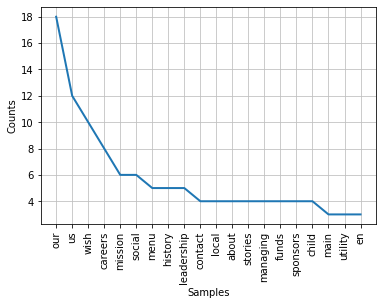


The frequency distribution for common words in www_aaas_orgmission.txt is



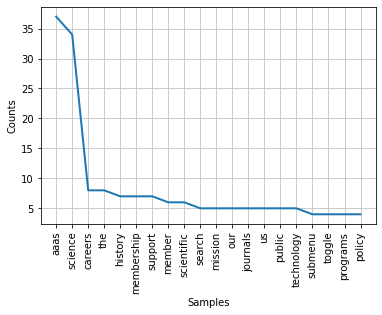


The frequency distribution for common words in www_alz_org_aboutour-impact.txt is



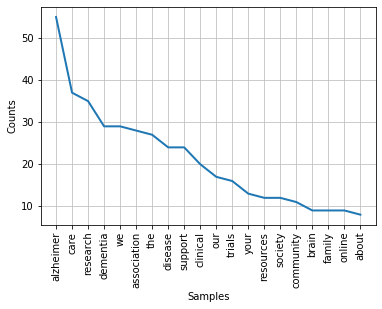


The frequency distribution for common words in www_amnesty_org_en_who-we-are.txt is



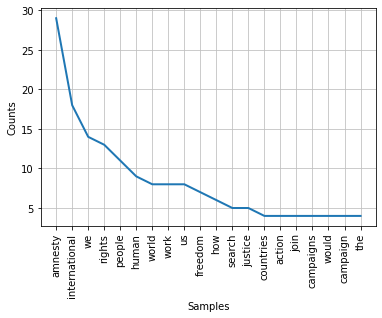


The frequency distribution for common words in www_artic_edu_about-usidentity.txt is



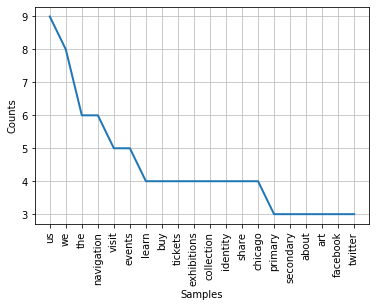


The frequency distribution for common words in www_cancer_org_about-ushtml.txt is



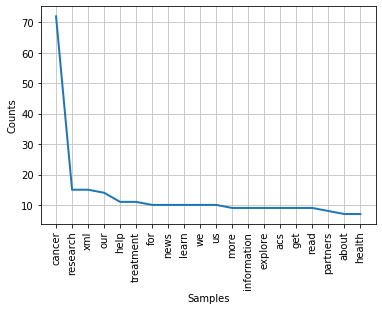


The frequency distribution for common words in www_cartercenter_org_about_indexhtml.txt is



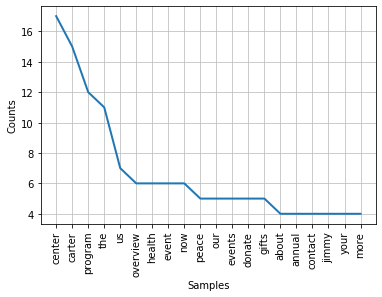


The frequency distribution for common words in www_crs_org_aboutmission-statement.txt is



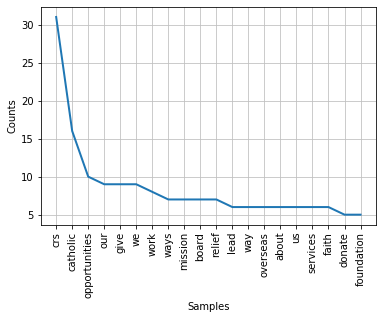


The frequency distribution for common words in www_doctorswithoutborders_org_who-we-areprinciples.txt is



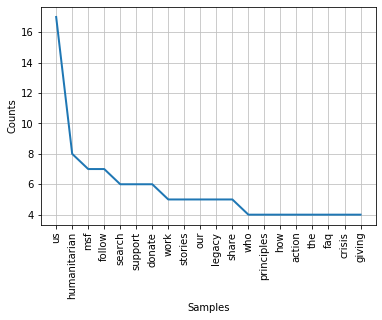


The frequency distribution for common words in www_feedingamerica_orgour-work.txt is



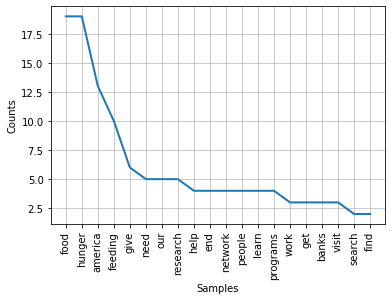


The frequency distribution for common words in www_gatesfoundation_orgWhat-We-Do.txt is



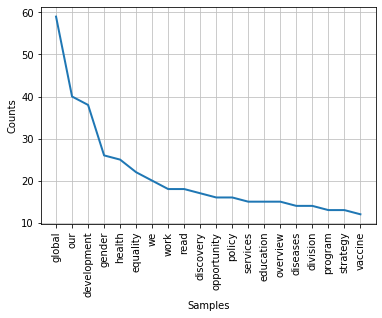


The frequency distribution for common words in www_habitat_org_aboutmission-and-vision.txt is



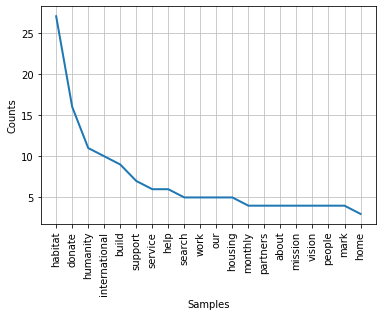


The frequency distribution for common words in www_humanesociety_orgour-mission.txt is



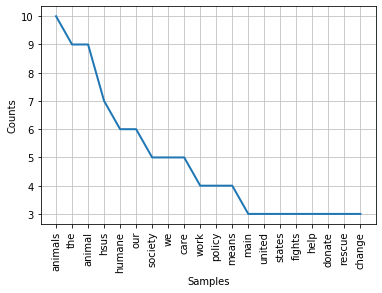


The frequency distribution for common words in www_mayoclinic_org_about-mayo-clinicmission-values.txt is



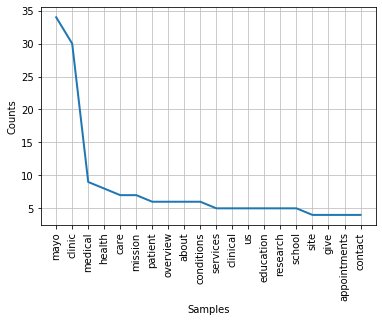


The frequency distribution for common words in www_nationalgeographic_org_about-us.txt is



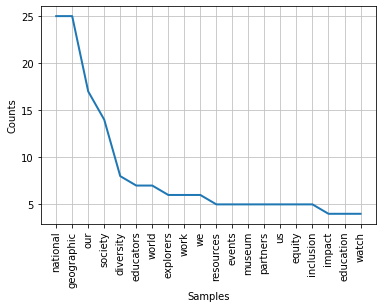


The frequency distribution for common words in www_npr_org_about.txt is



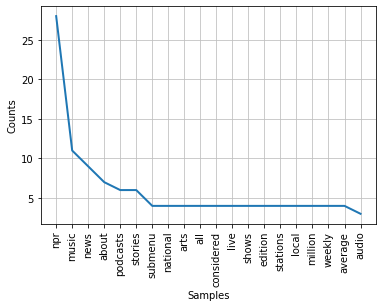


The frequency distribution for common words in www_nypl_org_help_about-nyplmission.txt is



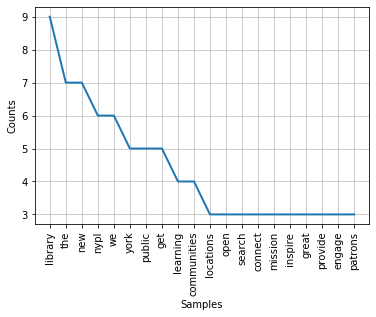


The frequency distribution for common words in www_one_org_us_about.txt is



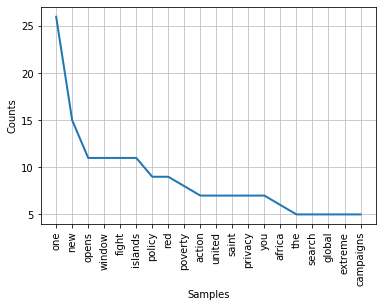


The frequency distribution for common words in www_pbs_org_about_about-pbs_mission-values.txt is



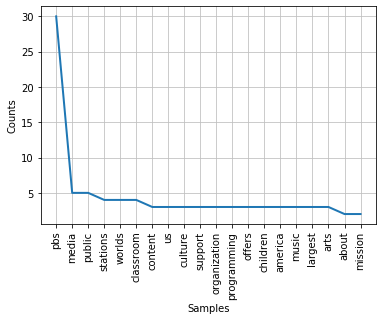


The frequency distribution for common words in www_redcross_org_about-us_who-we-are_mission-and-valueshtml.txt is



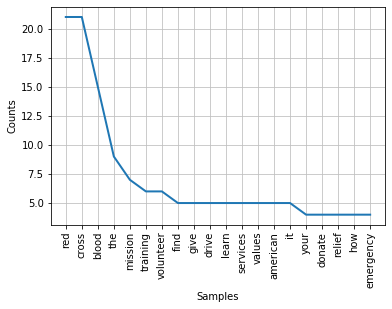


The frequency distribution for common words in www_rmhc_orgabout-us.txt is



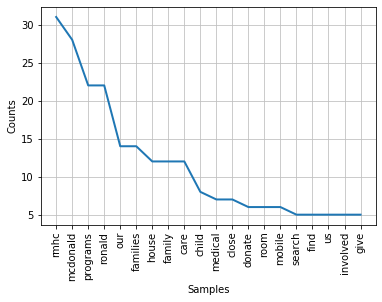


The frequency distribution for common words in www_salvationarmyusa_org_usn_about.txt is



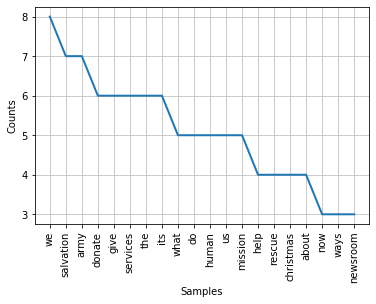


The frequency distribution for common words in www_ted_com_aboutour-organization.txt is



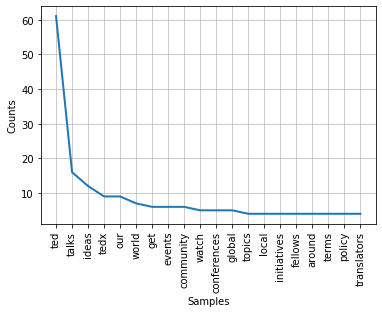


The frequency distribution for common words in www_unicefusa_orgmission.txt is



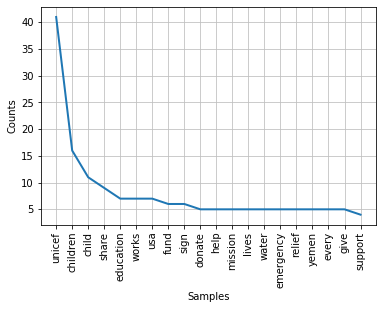


The frequency distribution for common words in www_unitedway_org_our-impactmission#.txt is



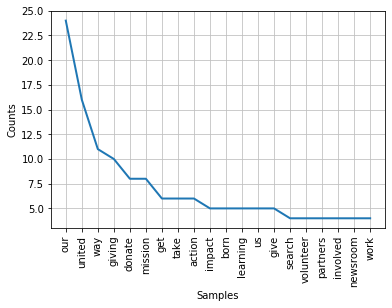


The frequency distribution for common words in www_ymca_netabout-us.txt is



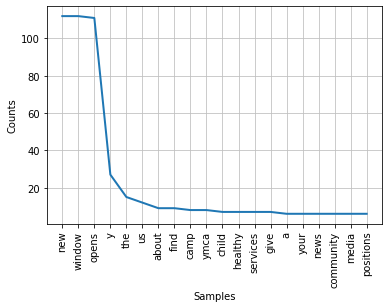

In [13]:
##Creating a frequency distribution for each

for file in MVV_files:
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_mission = nonprofit.read()
    mission_tokens = nltk.word_tokenize(nonprofit_mission)
    
    clean_nonprofit_tokens = []
    
    for tokens in mission_tokens:
        if tokens not in sw and tokens.isalpha():
            clean_nonprofit_tokens.append(tokens.lower())
            
    fdist = FreqDist(clean_nonprofit_tokens)
    
    print("\n" + "The frequency distribution for common words in" + " " + file + " " + "is" + "\n")
    
    fdist.plot(20)



The frequency distribution for all common words in mission/vision/values statements is:



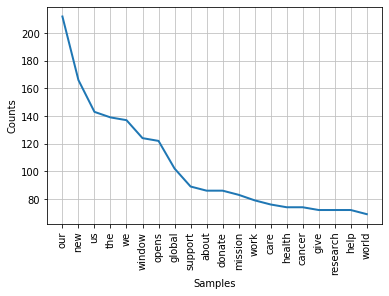

In [14]:
##Most common tokens overall

combined_MVV_tokens = []

for file in MVV_files:
    
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_mission = nonprofit.read()
    mission_tokens = nltk.word_tokenize(nonprofit_mission)
    
    
    
    for tokens in mission_tokens:
        if tokens not in sw and tokens.isalpha() and tokens != 'https': #Removing irrelevant tokens that appear
            combined_MVV_tokens.append(tokens.lower())

fdist = FreqDist(combined_MVV_tokens)
    
print("The frequency distribution for all common words in mission/vision/values statements is:" + "\n")
    
fdist.plot(20)

In [15]:
##Printing out the most common words
Counter(combined_MVV_tokens).most_common(20)

[('our', 212),
 ('new', 166),
 ('us', 143),
 ('the', 139),
 ('we', 137),
 ('window', 124),
 ('opens', 122),
 ('global', 102),
 ('support', 89),
 ('about', 86),
 ('donate', 86),
 ('mission', 83),
 ('work', 79),
 ('care', 76),
 ('health', 74),
 ('cancer', 74),
 ('give', 72),
 ('research', 72),
 ('help', 72),
 ('world', 69)]

In [18]:
#Looking at common subject verb objects 

# Set up our parser
parser = spacy.load('en_core_web_sm')

In [20]:
combined_MVV=[]

for file in MVV_files:
    
    open_file = open(file, "r", encoding="Latin-1")
    read_file = open_file.read()
    
    wrapped_text = textwrap.wrap(read_file)
    
    doc = parser(str(wrapped_text))
    
    combined_MVV.append(doc) #Adding each wrapped file to the combined list for use later on
    
    nonprofit_common_SVOs = Counter(findSVOs(doc)).most_common(25) #Identify top 25 SVOs
    
    print(str(nonprofit_common_SVOs) + "\n\n")

[(('sponsors', 'refer', 'links'), 2), (('stories', 'managing', 'our'), 2), (('mission', 'make', 'main'), 1), (('leadership', 'see', 'snow'), 1), (('i', 'see', 'snow'), 1), (('sponsors', 'refer', 'menu'), 1), (('stories', 'managing', 'funds'), 1), (('belief', 'guides', 'us'), 1), (('belief', 'guides', 'everything'), 1), (('it', 'going', 'us'), 1), (('it', 'going', 'children'), 1), (('it', 'going', 'much'), 1), (('it', 'compels', 'us'), 1), (('it', 'drives', 'us'), 1), (('principle', 'grant', 'wish'), 1), (('we', 'create', 'wishes'), 1), (('act', 'give', 'them'), 1)]


[(('archives', 'hold', 'records'), 2), (('skip', 'search', 'skip'), 1), (('skip', 'footer', 'aaas'), 1), (('join', 'become', 'member'), 1), (('aaas', 'seeks', 'innovation'), 1), (('board', 'strengthen', 'goals'), 1), (('board', 'strengthen', 'support'), 1), (('goals', 'enhance', 'communication'), 1), (('engineers', 'defend', 'integrity'), 1), (('engineers', 'defend', 'use'), 1), (('who', 'shares', 'goals'), 1), (('mathemat

[(('we', 'work', 'partners'), 4), (('division', 'achieve', 'equality'), 2), (('leadership', 'removing', 'barriers'), 2), (('partners', 'affect', 'change'), 2), (('students', 'graduate', 'school'), 2), (('we', 'make', 'grants'), 1), (('we', 'make', 'access'), 1), (('we', '!fund', 'resources'), 1), (('gatesfoundation.org', 'review', 'privacy'), 1), (('site', 'store', 'cookies'), 1), (('site', 'store', 'information'), 1), (('site', 'store', 'computer'), 1), (('site', 'store', 'technologies'), 1), (('you', 'agree', 'placement'), 1), (('you', 'agree', 'cookies'), 1), (('you', 'agree', 'technologies'), 1), (('job', 'is', 'results'), 1), (('do', 'find', 'issue'), 1), (('do', 'find', 'discovery'), 1), (('do', 'find', 'maternal'), 1), (('we', 'work', 'problems'), 1), (('division', 'reduce', 'inequities'), 1), (('division', 'expand', 'services'), 1), (('division', 'expand', 'access'), 1), (('division', 'stimulate', 'growth'), 1)]


[(('mission', 'put', 'love'), 2), (('messaging', 'induce', 'conv

[(('individuals', 'save', 'lives'), 2), (('order', 'enjoy', 'confidence'), 2), (('site', 'find', 'locations'), 1), (('site', 'find', 'ways'), 1), (('site', 'find', 'gifts'), 1), (('ways', 'give', 'partners'), 1), (('we', 'bring', 'hope'), 1), (('donate', 'find', 'requirements'), 1), (('donate', 'find', 'types'), 1), (('donors', 'learn', 'drive'), 1), (('employees', 'become', 'cross'), 1), (('volunteer', 'become', 'opportunities'), 1), (('relief', 'find', 'loved'), 1), (('ones', 'prepare', 'for'), 1), (('prevents', 'alleviates', 'suffering'), 1), (('prevents', 'alleviates', 'face'), 1), (('prevents', 'mobilizing', 'power'), 1), (('we', 'turn', 'compassion'), 1), (('we', 'turn', 'action'), 1), (('people', 'affected', 'country'), 1), (('people', 'receive', 'care'), 1), (('members', 'find', 'support'), 1), (('families', 'find', 'support'), 1), (('comfort', 'needed', 'emergency'), 1), (('individuals', 'save', 'skills'), 1)]


[(('programs', 'allow', 'parents'), 2), (('parents', 'incurring',

In [21]:
##All Mission, Vision, Values Statements SVOs

parsed_MVV = parser(str(combined_MVV))
Counter(findSVOs(parsed_MVV)).most_common(25)

[(('you', 'unsubscribe', 'time'), 5),
 (('we', 'work', 'partners'), 4),
 (('we', 'accelerate', 'research'), 3),
 (('sponsors', 'refer', 'links'), 2),
 (('stories', 'managing', 'our'), 2),
 (('archives', 'hold', 'records'), 2),
 (('advocate', 'improving', 'state'), 2),
 (('we', 'provide', 'care'), 2),
 (('we', 'provide', 'resources'), 2),
 (('studies', 'matching', 'service'), 2),
 (('amnesty', 'launches', 'campaign'), 2),
 (('protects', 'protecting', 'rights'), 2),
 (('we', 'achieve', 'side'), 2),
 (('encoding="utf-8', 'read', 'more'), 2),
 (('ways', 'give', 'ways'), 2),
 (('we', 'work', 'research'), 2),
 (('you', 'agree', 'placement'), 2),
 (('division', 'achieve', 'equality'), 2),
 (('leadership', 'removing', 'barriers'), 2),
 (('partners', 'affect', 'change'), 2),
 (('students', 'graduate', 'school'), 2),
 (('mission', 'put', 'love'), 2),
 (('messaging', 'induce', 'conversion'), 2),
 (('they', 'need', 'you'), 2),
 (('gift', 'means', 'holiday'), 2)]

## Pulling Nonprofit Tweets


In [22]:
# Storing all twitter handles in a dictionary
user_dict = {'MakeAWish': [],
             'aaas': [],
             'alzassociation': [],
             'amnestyusa': [],
             'artinstitutechi': [],
             'AmericanCancer': [],
             'CarterCenter': [],
             'CatholicRelief': [],
             'MSF_USA': [],
             'FeedingAmerica': [],
             'gatesfoundation': [],
             'Habitat_org': [],
             'HumaneSociety': [],
             'MayoClinic': [],
             'NatGeo': [],
             'NPR': [],
             'nypl': [],
             'ONECampaign': [],
             'PBS': [],
             'RedCross': [],
             'RMHC': [],
             'SalvationArmyUS': [],
             'TEDTalks': [],
             'UNICEF': [],
             'ymca': [],
             'UnitedWay': []
             
            }

In [23]:
#Creating a for loop to pull 1000 tweets form each nonprofit and store them in a text file
for nonprofit in user_dict.keys():

    # Writing a text file to store tweets
    with open(f'{nonprofit}_tweets.txt','w', encoding='utf-8') as out_file:
        count = 1000
        tweets = tweepy.Cursor(api.user_timeline,id=nonprofit).items(count)
        tweets_list = [[tweet.text] for tweet in tweets] 
        out_file.write(str(tweets_list))


In [7]:
##Storing Tweet Text Files

nonprofit_tweet_files = ["MakeAWish_tweets.txt",
                         "aaas_tweets.txt",
                         "alzassociation_tweets.txt",
                         "amnestyusa_tweets.txt",
                         "artinstitutechi_tweets.txt",
                         "AmericanCancer_tweets.txt",
                         "CarterCenter_tweets.txt",
                         "CatholicRelief_tweets.txt",
                         "MSF_USA_tweets.txt",
                         "FeedingAmerica_tweets.txt",
                         "gatesfoundation_tweets.txt",
                         "Habitat_org_tweets.txt",
                         "HumaneSociety_tweets.txt",
                         "MayoClinic_tweets.txt",
                         "NatGeo_tweets.txt",
                         "NPR_tweets.txt",
                         "nypl_tweets.txt",
                         "ONECampaign_tweets.txt",
                         "PBS_tweets.txt",
                         "RedCross_tweets.txt",
                         "RMHC_tweets.txt",
                         "SalvationArmyUS_tweets.txt",
                         "TEDTalks_tweets.txt",
                         "UNICEF_tweets.txt",
                         "ymca_tweets.txt",
                         "UnitedWay_tweets.txt"]


The frequency distribution for common words in MakeAWish_tweets.txt is



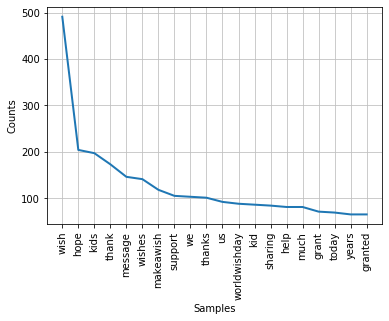


The frequency distribution for common words in aaas_tweets.txt is



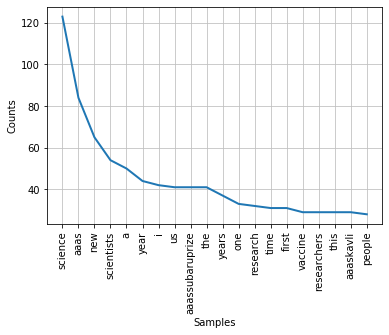


The frequency distribution for common words in alzassociation_tweets.txt is



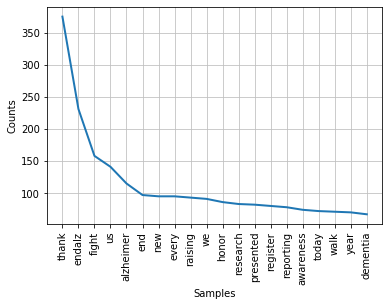


The frequency distribution for common words in amnestyusa_tweets.txt is



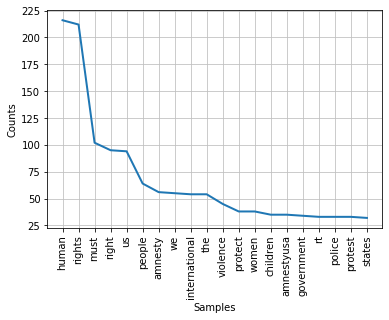


The frequency distribution for common words in artinstitutechi_tweets.txt is



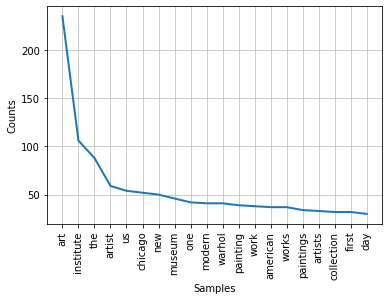


The frequency distribution for common words in AmericanCancer_tweets.txt is



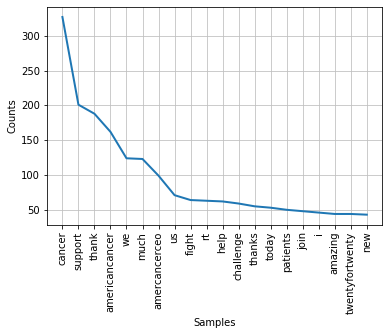


The frequency distribution for common words in CarterCenter_tweets.txt is



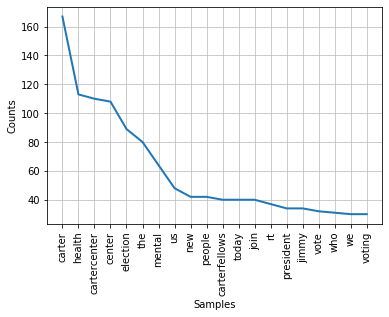


The frequency distribution for common words in CatholicRelief_tweets.txt is



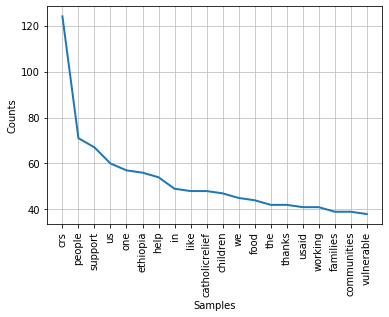


The frequency distribution for common words in MSF_USA_tweets.txt is



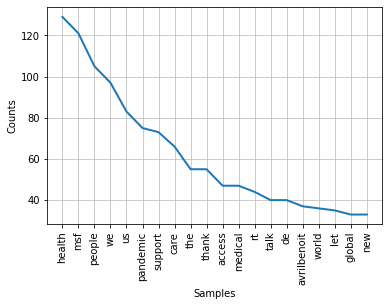


The frequency distribution for common words in FeedingAmerica_tweets.txt is



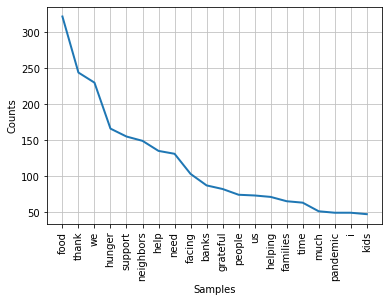


The frequency distribution for common words in gatesfoundation_tweets.txt is



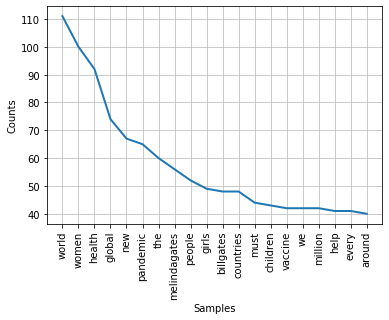


The frequency distribution for common words in Habitat_org_tweets.txt is



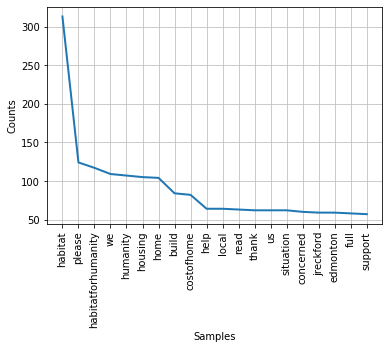


The frequency distribution for common words in HumaneSociety_tweets.txt is



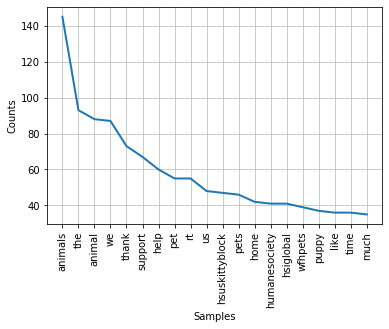


The frequency distribution for common words in MayoClinic_tweets.txt is



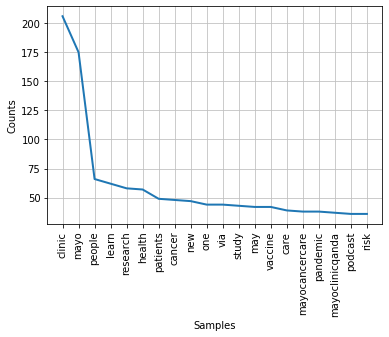


The frequency distribution for common words in NatGeo_tweets.txt is



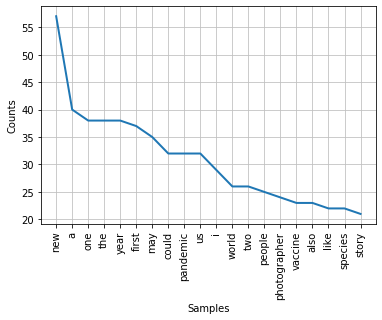


The frequency distribution for common words in NPR_tweets.txt is



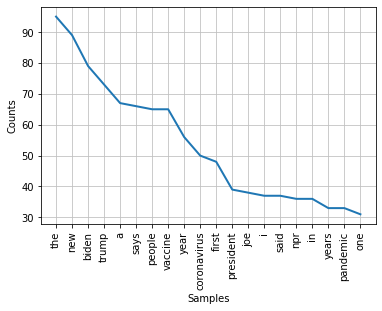


The frequency distribution for common words in nypl_tweets.txt is



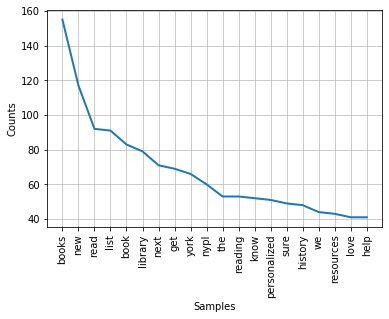


The frequency distribution for common words in ONECampaign_tweets.txt is



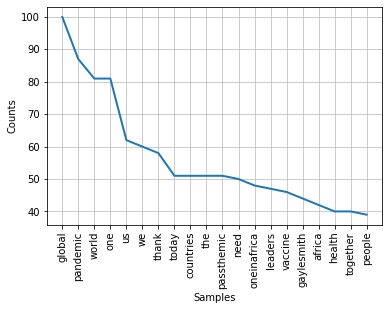


The frequency distribution for common words in PBS_tweets.txt is



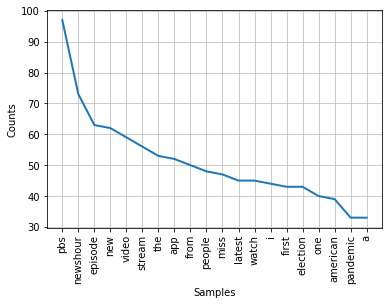


The frequency distribution for common words in RedCross_tweets.txt is



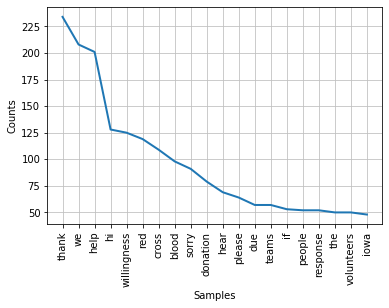


The frequency distribution for common words in RMHC_tweets.txt is



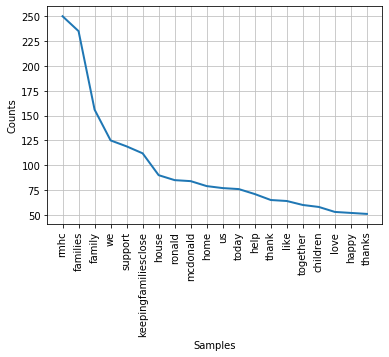


The frequency distribution for common words in SalvationArmyUS_tweets.txt is



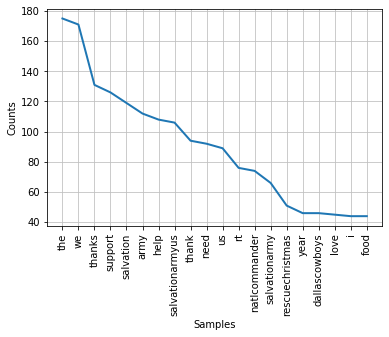


The frequency distribution for common words in TEDTalks_tweets.txt is



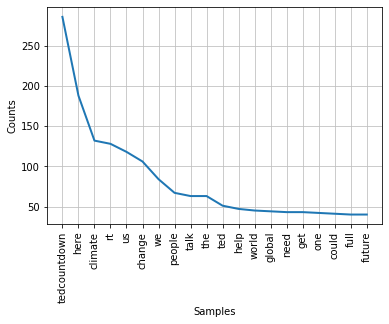


The frequency distribution for common words in UNICEF_tweets.txt is



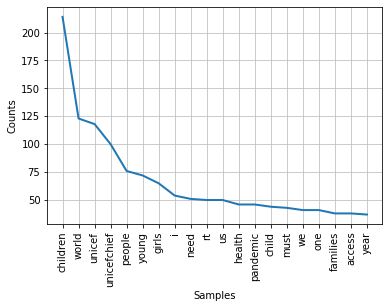


The frequency distribution for common words in ymca_tweets.txt is



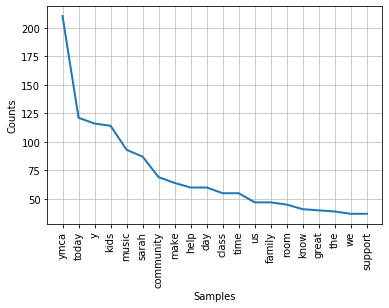


The frequency distribution for common words in UnitedWay_tweets.txt is



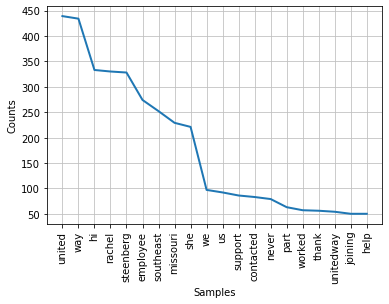

In [25]:
##Creating a frequency distribution for each

for file in nonprofit_tweet_files:
    
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_tweets = nonprofit.read()
    tweet_tokens = nltk.word_tokenize(nonprofit_tweets)
    
    clean_nonprofit_tokens = []
    
    for tokens in tweet_tokens:
        if tokens not in sw and tokens.isalpha() and tokens != 'https' and tokens != 'amp': #Removing irrelevant tokens that appear
            clean_nonprofit_tokens.append(tokens.lower())
            
    fdist = FreqDist(clean_nonprofit_tokens)
    
    print("\n" + "The frequency distribution for common words in" + " " + file + " " + "is" + "\n")
    
    fdist.plot(20)


The frequency distribution for all common words in tweets is:



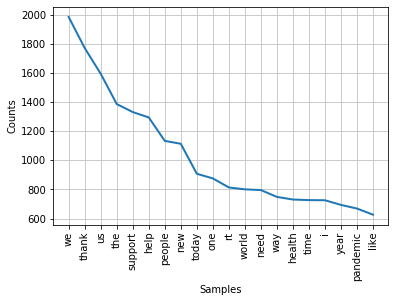

In [26]:
##Combined Tokens Frequency Distribution

combined_tweet_tokens = []

for file in nonprofit_tweet_files:
    nonprofit = open(file, "r", encoding="Latin-1")
    nonprofit_tweets = nonprofit.read()
    tweet_tokens = nltk.word_tokenize(nonprofit_tweets)
    
    
    
    for tokens in tweet_tokens:
        if tokens not in sw and tokens.isalpha() and tokens != 'https' and tokens != 'amp': #Removing irrelevant tokens that appear
            combined_tweet_tokens.append(tokens.lower())
            
fdist = FreqDist(combined_tweet_tokens)
    
print("The frequency distribution for all common words in tweets is:" + "\n")
    
fdist.plot(20)

In [27]:
##Listing out the most common words in tweets

Counter(combined_tweet_tokens).most_common(20)


[('we', 1985),
 ('thank', 1772),
 ('us', 1595),
 ('the', 1387),
 ('support', 1332),
 ('help', 1295),
 ('people', 1134),
 ('new', 1114),
 ('today', 908),
 ('one', 876),
 ('rt', 814),
 ('world', 801),
 ('need', 796),
 ('way', 749),
 ('health', 731),
 ('time', 727),
 ('i', 726),
 ('year', 694),
 ('pandemic', 669),
 ('like', 627)]

In [28]:
#Looking at common subject verb objects 

combined_tweets=[]

for file in nonprofit_tweet_files:
    
    open_file = open(file, "r", encoding="Latin-1")
    read_file = open_file.read()
    
    wrapped_text = textwrap.wrap(read_file)
    
    doc = parser(str(wrapped_text))
    
    combined_tweets.append(doc) #Adding each wrapped file to the combined list for use later on
    
    nonprofit_common_SVOs = Counter(findSVOs(doc)).most_common(25) #Identify top 25 SVOs
    
    print(str(nonprofit_common_SVOs) + "\n\n")

[(('hope', 'wish', 'kids'), 8), (('thanks', 'joining', 'us'), 6), (('thanks', 'sharing', 'message'), 6), (('we', 'love', 'this'), 5), (('you', 'bring', 'experiences'), 4), (('you', 'grant', 'wishes'), 4), (('you', 'wish', 'kids'), 4), (('world', 'needs', 'hope'), 4), (('m', 'wearing', 'pin'), 4), (('you', 'shop', '@partycity'), 3), (('we', 'thank', 'you'), 3), (('wishes', 'come', 'kids'), 3), (('us', 'grant', 'wishes'), 3), (('we', 'granting', 'wish'), 3), (('we', 'inviting', 'families'), 3), (('wish', 'grant', 'wishes'), 3), (('friends', 'doubling', 'donations'), 3), (('we', 'surprise', '@makeawish'), 3), (('hope', 'sharing', 'message'), 3), (('you', 'bring', 'joy'), 2), (('@disney', 'thank', 'you'), 2), (('it', 'brought', 'joy'), 2), (('gift', 'gives', 'holiday'), 2), (('think', 'bringing', 'joy'), 2), (('smile', 'says', 'it'), 2)]


[(('ai', 'becoming', 'tool'), 4), (('work', 'stop', 'them'), 4), (('inequity', 'woven', 'fabric'), 4), (('books', 'discover', 'kids'), 4), (('books', 'd

[(('neighbors', 'facing', 'hunger'), 24), (('you', 'enter', 'tool'), 16), (('families', 'facing', 'hunger'), 13), (('you', 'enter', 'code'), 9), (('¡', 'thank', 'you'), 7), (('people', 'facing', 'hunger'), 7), (('you', 'use', 'tool'), 6), (('commitment', 'helping', 'neighbors'), 6), (('commitment', 'helping', 'need'), 6), (('us', 'feed', 'neighbors'), 5), (('@alancumming', 'thank', 'you'), 4), (('ð\\x9f§¡\\', 'thank', 'you'), 4), (('us', 'feed', 'more'), 4), (('we', 'make', 'difference'), 4), (('banks', 'feeding', 'people'), 4), (('people', 'facing', 'america'), 4), (('@darbysofficial', 'thank', 'you'), 3), (('you', 'enter', 'your'), 3), (('people', 'visiting', 'banks'), 3), (('someone', 'open', 'me'), 3), (('someone', 'open', 'trunk'), 3), (('banks', 'feeding', 'pandemic'), 3), (('you', 'facing', 'neighbors'), 3), (('you', 'facing', 'hunger'), 3), (('you', 'take', 'action'), 3)]


[(('women', 'centered', 'response'), 3), (('girls', 'centered', 'response'), 3), (('country', 'reduced', 

[(('you', 'miss', 'episode'), 9), (('panelists', 'discuss', '.'), 3), (('you', 'miss', '@masterpiecepbs'), 3), (('pandemic', 'comes', 'end'), 2), (('we', 'take', 'moment'), 2), (('we', 'use', 'joy'), 2), (('school', 'assimilate', 'children'), 2), (('you', 'miss', '@novapbs'), 2), (('you', 'miss', 'finale'), 2), (('you', 'miss', 'royaltravelpbs'), 2), (('organizations', 'alleviate', 'crisis'), 2), (('organizations', 'alleviate', 'region'), 2), (('panelists', 'discuss', 'election'), 2), (('it', 'comes', 'end'), 2), (('advent', 'brought', 'americans'), 2), (('advent', 'brought', 'freedom'), 2), (('recipes', 'celebrate', 'vegetarianism'), 2), (('weâ\\x80\\x99ve', 'seen', 'time'), 2), (('musicians', 'master', 'music'), 2), (('musicians', 'master', 'https://t.co/2a7wtzaa0z'), 2), (('roadmap', 'minimize', 'https://t.co/ncn8dgwik2'), 2), (('.@newshour', 'takes', 'look'), 1), (('song', 'celebrating', 'resilience'), 1), (('song', 'celebrating', 'performance'), 1), (("\\'as", 'came', 'close'), 1)

In [32]:
##All Tweet SVOs

##Had to incresae maximum
parser.max_length=4000000

parsed_tweets = parser(str(combined_tweets))
Counter(findSVOs(parsed_tweets)).most_common(25)

[(('way', '!support', 'part'), 38),
 (('teams', 'met', 'challenges'), 29),
 (('we', 'appreciate', 'support'), 25),
 (('we', 'thank', 'you'), 24),
 (('neighbors', 'facing', 'hunger'), 24),
 (('data', 'presented', 'aaic20'), 22),
 (('you', 'making', 'difference'), 18),
 (('you', 'enter', 'tool'), 16),
 (('series', 'make', 'food'), 16),
 (('researchers', 'join', 'us'), 15),
 (('research', 'presented', 'aaic20'), 15),
 (('experts', 'giving', 'recommendations'), 15),
 (('thanks', 'joining', 'us'), 14),
 (('she', 'contacted', 'câ\\x80'), 14),
 (('families', 'facing', 'hunger'), 13),
 (('@hopehummus', 'thank', 'you'), 12),
 (('t', 'be', 'event'), 12),
 (('we', 'need', 'you'), 11),
 (('time', 'register', 'aaic20'), 11),
 (('researchers', 'join', 'event'), 11),
 (('we', 'need', 'help'), 11),
 (('we', 'applaud', 'efforts'), 11),
 (('we', 'appreciate', 'it'), 10),
 (('you', 'enter', 'code'), 10),
 (('steenberg', '!worked', 'united'), 10)]

## Identifying Values Frequencies

In [10]:
##First I will read in the text files that contain all the values and their synonyms

values_files = ["achievement.txt",
                "benevolence.txt",
                "conformity.txt",
                "hedonism.txt",
                "power.txt",
                "security.txt",
                "self_direction.txt",
                "stimulation.txt",
                "tradition.txt",
                "universalism.txt"]

values_dict=dict()

for file in values_files: #For each text file
    with open(file, "r", encoding = "Latin-1") as infile: #Read in and tokenize the file
        key=file.replace("_synonyms.txt", "")
        words=infile.read()
        tokens=nltk.word_tokenize(words)
        
        values_dict[key] = set(t for t in tokens if t.isalpha()) #Add the list of synonyms into the dictionary using the overarching value as the key

In [34]:
def identify_values(file,v):  #Function will open a file, tokenize it, and store clean tokens in a list
    
    results=dict() #results will be stored in a dictionary
    
    open_file = open(file, "r", encoding = "Latin-1")
    
    read_file = open_file.read()
    
    tokenize_file = nltk.word_tokenize(read_file)
    
    clean_tokens = []
    
    for tokens in tokenize_file:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
            
    for value,words in v.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in clean_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(clean_tokens)  #Divide the amount of matching words by all words in text file
        
        results[value] = round(values_freq, 4) 
    
    
    return(results) ##Return the frequencies of each value, which are in a dictionary
            
    


## Values Frequencies in Individual Organization Tweets


In [35]:
#Printing the values in the tweet files
for file in nonprofit_tweet_files:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

MakeAWish_tweets.txt

{'achievement.txt': 0.0066, 'benevolence.txt': 0.0733, 'conformity.txt': 0.0171, 'hedonism.txt': 0.0126, 'power.txt': 0.0038, 'security.txt': 0.006, 'self_direction.txt': 0.0132, 'stimulation.txt': 0.0092, 'tradition.txt': 0.0029, 'universalism.txt': 0.0037}


aaas_tweets.txt

{'achievement.txt': 0.0128, 'benevolence.txt': 0.0096, 'conformity.txt': 0.006, 'hedonism.txt': 0.0041, 'power.txt': 0.0078, 'security.txt': 0.0076, 'self_direction.txt': 0.0264, 'stimulation.txt': 0.009, 'tradition.txt': 0.0019, 'universalism.txt': 0.0101}


alzassociation_tweets.txt

{'achievement.txt': 0.013, 'benevolence.txt': 0.0593, 'conformity.txt': 0.0149, 'hedonism.txt': 0.006, 'power.txt': 0.0035, 'security.txt': 0.0262, 'self_direction.txt': 0.023, 'stimulation.txt': 0.0054, 'tradition.txt': 0.0024, 'universalism.txt': 0.0074}


amnestyusa_tweets.txt

{'achievement.txt': 0.0037, 'benevolence.txt': 0.0111, 'conformity.txt': 0.0112, 'hedonism.txt': 0.0016, 'power.txt': 0.0222, 'secu

## Values Frequencies in Individual Mission, Vision, and Values Statements

In [36]:
#Printing the values in mission/vision/values file
for file in MVV_files:
    print(file + "\n\n" + str(identify_values(file, values_dict)) + "\n\n" )

wish_orgmission.txt

{'achievement.txt': 0.0, 'benevolence.txt': 0.0367, 'conformity.txt': 0.0133, 'hedonism.txt': 0.0, 'power.txt': 0.0133, 'security.txt': 0.0, 'self_direction.txt': 0.03, 'stimulation.txt': 0.0167, 'tradition.txt': 0.0067, 'universalism.txt': 0.0033}


www_aaas_orgmission.txt

{'achievement.txt': 0.0223, 'benevolence.txt': 0.0186, 'conformity.txt': 0.0241, 'hedonism.txt': 0.0019, 'power.txt': 0.0056, 'security.txt': 0.0019, 'self_direction.txt': 0.0297, 'stimulation.txt': 0.0056, 'tradition.txt': 0.0019, 'universalism.txt': 0.0204}


www_alz_org_aboutour-impact.txt

{'achievement.txt': 0.0161, 'benevolence.txt': 0.0499, 'conformity.txt': 0.0198, 'hedonism.txt': 0.0005, 'power.txt': 0.0091, 'security.txt': 0.029, 'self_direction.txt': 0.0493, 'stimulation.txt': 0.0097, 'tradition.txt': 0.0043, 'universalism.txt': 0.0107}


www_amnesty_org_en_who-we-are.txt

{'achievement.txt': 0.0063, 'benevolence.txt': 0.0151, 'conformity.txt': 0.0063, 'hedonism.txt': 0.0013, 'power.

## Values Frequencies in Combined Mission, Vision, Values Statements

In [44]:

results=dict()

for value,words in values_dict.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in combined_MVV_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(combined_MVV_tokens)  #Divide the amount of matching words by all words in text file
        
        results[value] = round(values_freq, 3)
        
print(results)

{'achievement.txt': 0.013, 'benevolence.txt': 0.041, 'conformity.txt': 0.012, 'hedonism.txt': 0.002, 'power.txt': 0.007, 'security.txt': 0.022, 'self_direction.txt': 0.032, 'stimulation.txt': 0.012, 'tradition.txt': 0.006, 'universalism.txt': 0.023}


## Values Frequencies in Combined Tweets

In [45]:
results=dict()

for value,words in values_dict.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in combined_tweet_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(combined_tweet_tokens)  #Divide the amount of matching words by all words in text file
        
        results[value] = round(values_freq, 3)
        
print(results)

{'achievement.txt': 0.008, 'benevolence.txt': 0.037, 'conformity.txt': 0.011, 'hedonism.txt': 0.006, 'power.txt': 0.009, 'security.txt': 0.02, 'self_direction.txt': 0.023, 'stimulation.txt': 0.009, 'tradition.txt': 0.004, 'universalism.txt': 0.014}


## Looking Back at Conservation Nonprofits

Most common words in Misson, Vision, Values Statements

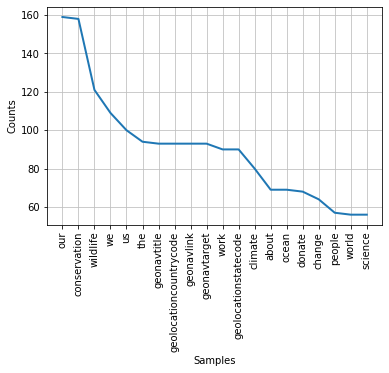

Most common words in Tweets

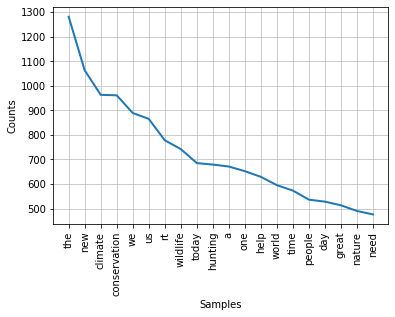

## Reference Organizations

Most common words in Mission, Vision, and Values Statements
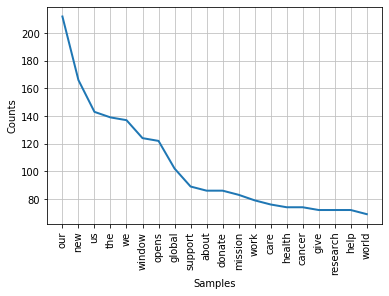

Most common words in Tweets
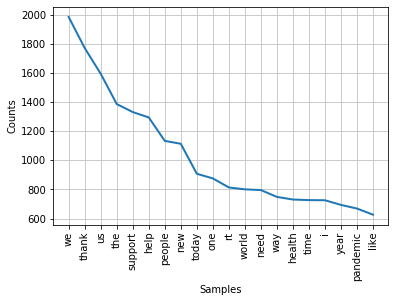


Tweets between reference organizations and conservation nonprofits appear distinctly different.

Mission, vision, and values statements often use very similar verbage

## Calculating Cosine Similarity Based on Values

In [4]:
def cosine_dist(a,b) :
    dist = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return(dist)

In [5]:
def values_similarity(file1,file2, v):
    
    org_name = file1.rstrip("tweets.txt")
    
    ###To calculate frequencies in tweets and store as vector###
    
    
    open_file1 = open(file1, "r", encoding = "Latin-1")
    
    read_file1 = open_file1.read()
    
    tokenize_file1 = nltk.word_tokenize(read_file1)
    
    clean_tokens = []
    
    for tokens in tokenize_file1:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
    
    a = [] #Store values freqs
    
    for value,words in v.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in clean_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(clean_tokens)  #Divide the amount of matching words by all words in text file
        
        file1_values_freq = round(values_freq, 4)
        
        a.append(file1_values_freq)
        
    
    
        
    ###To calculate frequences in MVVs as vector###
    
    
    open_file2 = open(file2, "r", encoding = "Latin-1")
    
    read_file2 = open_file2.read()
    
    tokenize_file2 = nltk.word_tokenize(read_file2)
    
    clean_tokens = []
    
    for tokens in tokenize_file2:
        if tokens not in sw and tokens.isalpha():
            clean_tokens.append(tokens.lower())
    b= []
    
    for value,words in v.items():  #for each key and synonym pair in the value dictionary
        
        matching_words = [w for w in clean_tokens if w in words  ] #identify and store words that appear in synonyms and clean tokens
    
        values_freq=len(matching_words)/len(clean_tokens)  #Divide the amount of matching words by all words in text file
        
        file2_values_freq = round(values_freq, 4) 
        
        b.append(file2_values_freq)
    
    
    
    return("The cosine distance between tweets and MVVs for" + " " + org_name + " " + "is" + " " + str(cosine_dist(a,b))) ##Return the frequencies of each value, which are in a dictionary

In [11]:
values_distances = [] 

for tweets, MVV in zip(nonprofit_tweet_files, MVV_files):
    values_distances.append(values_similarity(tweets, MVV, values_dict))

In [12]:
values_distances

['The cosine distance between tweets and MVVs for MakeAWish_ is 0.8320676261343289',
 'The cosine distance between tweets and MVVs for aaas_ is 0.8976923321637896',
 'The cosine distance between tweets and MVVs for alzassociation_ is 0.9305046844290991',
 'The cosine distance between tweets and MVVs for amnestyusa_ is 0.8899248775011465',
 'The cosine distance between tweets and MVVs for artinstitutechi_ is 0.7827253048096986',
 'The cosine distance between tweets and MVVs for AmericanCancer_ is 0.8457674319800029',
 'The cosine distance between tweets and MVVs for CarterCenter_ is 0.78814700286537',
 'The cosine distance between tweets and MVVs for CatholicRelief_ is 0.8611991731866566',
 'The cosine distance between tweets and MVVs for MSF_USA_ is 0.8043859849082922',
 'The cosine distance between tweets and MVVs for FeedingAmerica_ is 0.9190036032388503',
 'The cosine distance between tweets and MVVs for gatesfoundation_ is 0.8912917301254365',
 'The cosine distance between tweets a

In [13]:
#Removing rest of string and just grabbing values of distances

just_distances=[]
for item in values_distances:
    distance=item.split('is ')[1]
    
    just_distances.append(distance)

just_distances

['0.8320676261343289',
 '0.8976923321637896',
 '0.9305046844290991',
 '0.8899248775011465',
 '0.7827253048096986',
 '0.8457674319800029',
 '0.78814700286537',
 '0.8611991731866566',
 '0.8043859849082922',
 '0.9190036032388503',
 '0.8912917301254365',
 '0.9627759514278403',
 '0.9205877664566858',
 '0.9208652525406292',
 '0.782368519600155',
 '0.7362218810909831',
 '0.9710492120923675',
 '0.8910549063245993',
 '0.8382292473699896',
 '0.9436499052337535',
 '0.9646172482026064',
 '0.8909751806457858',
 '0.7665244412440361',
 '0.8272420319884181',
 '0.8252234861916322',
 '0.8871837331391504']

In [14]:
#Creating a histogram to show distribution of distances between tweets and MVVs

rounded_distances=[]
for item in just_distances:
    rounded=round(float(item),2)
    rounded_distances.append(rounded)

rounded_distances

[0.83,
 0.9,
 0.93,
 0.89,
 0.78,
 0.85,
 0.79,
 0.86,
 0.8,
 0.92,
 0.89,
 0.96,
 0.92,
 0.92,
 0.78,
 0.74,
 0.97,
 0.89,
 0.84,
 0.94,
 0.96,
 0.89,
 0.77,
 0.83,
 0.83,
 0.89]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        2., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 3., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 1.]),
 array([0.74  , 0.7423, 0.7446, 0.7469, 0.7492, 0.7515, 0.7538, 0.7561,
        0.7584, 0.7607, 0.763 , 0.7653, 0.7676, 0.7699, 0.7722, 0.7745,
        0.7768, 0.7791, 0.7814, 0.7837, 0.786 , 0.7883, 0.7906, 0.7929,
        0.7952, 0.7975, 0.7998, 0.8021, 0.8044, 0.8067, 0.809 , 0.8113,
        0.8136, 0.8159, 0.8182, 0.8205, 0.8228, 0.8251, 0.8274, 0.8297,
        0.832 , 0.8343, 0.8366, 0.8389, 0.8412, 0.8435, 0.8458, 0.8481,
        0.8504, 0.8527, 0.855 , 0.8573, 0.8596, 0.8619, 0.8642, 0.8665,
        0.8688, 0.8711, 0.8734, 0.8757, 0.878 

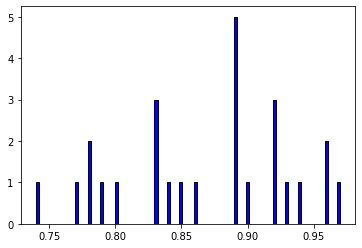

In [15]:
# matplotlib histogram of rounded distances
plt.hist(rounded_distances, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 100)

In [17]:
#Basic stats of distances
print(np.mean(rounded_distances))
print(np.std(rounded_distances))

0.8680769230769231
0.06373136112254739


In [20]:
y = np.array(rounded_distances)
skewness = scipy.stats.skew(y, bias=False)
print (skewness)

-0.2635209165034479
